<div style="text-align: center"><b><u>INFO 6105 Data Science Eng Methods and Tools, FINAL PROJECT</div>
<div style="text-align: center">Aayush Vijayant (001375926) </div>
<div style="text-align: center">Date: December 11th 2019</div>

<br />
    
## Notebook Contents:
- Part 1: [Maze Runner - NLP](#section1)
- Part 2: [PageRank and WordCloud](#section2)
- Part 3: [LDA](#section3)

In [91]:
import PyPDF2
import re
import textract
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
import matplotlib.pyplot as plt
import seaborn
import nltk

# Part 1: Maze Runner - NLP

**We start by reading the text file and processing it by trimming some extra data like '\n'**

In [92]:
maze_runner = open('the_maze_runner.txt', "r")

text = maze_runner.read()

text = text.replace("\ufeff" , "")
text = text.replace("\n", "")
text = text.lower()

processed_sent = text.lower()
processed_sent = re.sub("[^a-zA-Z. ]+", ' ', processed_sent)

processed_text = text.lower()
processed_text = re.sub("[^a-zA-Z]+", ' ', processed_text)

**Now we take a look at our data**

In [93]:
text

'chapter 1 he began his new life standing up, surrounded by cold darkness and stale, dusty air. metal ground against metal; a lurching shudder shook the oor beneath him. he fell down at the sudden movement and shu ed backward on his hands and feet, drops of sweat beading on his forehead despite the cool air. his back struck a hard metal wall; he slid along it until he hit the corner of the room. sinking to the oor, he pulled his legs up tight against his body, hoping his eyes would soon adjust to the darkness. with another jolt, the room jerked upward like an old lift in a mine shaft. harsh sounds of chains and pulleys, like the workings of an ancient steel factory, echoed through the room, bouncing off the walls with a hollow, tinny whine. the lightless elevator swayed back and forth as it ascended, turning the boy’s stomach sour with nausea; a smell like burnt oil invaded his senses, making him feel worse. he wanted to cry, but no tears came; he could only sit there, alone, waiting. 

In [94]:
processed_text

'chapter he began his new life standing up surrounded by cold darkness and stale dusty air metal ground against metal a lurching shudder shook the oor beneath him he fell down at the sudden movement and shu ed backward on his hands and feet drops of sweat beading on his forehead despite the cool air his back struck a hard metal wall he slid along it until he hit the corner of the room sinking to the oor he pulled his legs up tight against his body hoping his eyes would soon adjust to the darkness with another jolt the room jerked upward like an old lift in a mine shaft harsh sounds of chains and pulleys like the workings of an ancient steel factory echoed through the room bouncing off the walls with a hollow tinny whine the lightless elevator swayed back and forth as it ascended turning the boy s stomach sour with nausea a smell like burnt oil invaded his senses making him feel worse he wanted to cry but no tears came he could only sit there alone waiting my name is thomas he thought t

**Here we make a list of words by tokenize the text**

In [95]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)

['chapter', '1', 'he', 'began', 'his', 'new', 'life', 'standing', 'up', ',', 'surrounded', 'by', 'cold', 'darkness', 'and', 'stale', ',', 'dusty', 'air', '.', 'metal', 'ground', 'against', 'metal', ';', 'a', 'lurching', 'shudder', 'shook', 'the', 'oor', 'beneath', 'him', '.', 'he', 'fell', 'down', 'at', 'the', 'sudden', 'movement', 'and', 'shu', 'ed', 'backward', 'on', 'his', 'hands', 'and', 'feet', ',', 'drops', 'of', 'sweat', 'beading', 'on', 'his', 'forehead', 'despite', 'the', 'cool', 'air', '.', 'his', 'back', 'struck', 'a', 'hard', 'metal', 'wall', ';', 'he', 'slid', 'along', 'it', 'until', 'he', 'hit', 'the', 'corner', 'of', 'the', 'room', '.', 'sinking', 'to', 'the', 'oor', ',', 'he', 'pulled', 'his', 'legs', 'up', 'tight', 'against', 'his', 'body', ',', 'hoping', 'his', 'eyes', 'would', 'soon', 'adjust', 'to', 'the', 'darkness', '.', 'with', 'another', 'jolt', ',', 'the', 'room', 'jerked', 'upward', 'like', 'an', 'old', 'lift', 'in', 'a', 'mine', 'shaft', '.', 'harsh', 'sounds

In [96]:
from nltk.tokenize import word_tokenize
processed_word=word_tokenize(processed_text)
print(processed_word)

['chapter', 'he', 'began', 'his', 'new', 'life', 'standing', 'up', 'surrounded', 'by', 'cold', 'darkness', 'and', 'stale', 'dusty', 'air', 'metal', 'ground', 'against', 'metal', 'a', 'lurching', 'shudder', 'shook', 'the', 'oor', 'beneath', 'him', 'he', 'fell', 'down', 'at', 'the', 'sudden', 'movement', 'and', 'shu', 'ed', 'backward', 'on', 'his', 'hands', 'and', 'feet', 'drops', 'of', 'sweat', 'beading', 'on', 'his', 'forehead', 'despite', 'the', 'cool', 'air', 'his', 'back', 'struck', 'a', 'hard', 'metal', 'wall', 'he', 'slid', 'along', 'it', 'until', 'he', 'hit', 'the', 'corner', 'of', 'the', 'room', 'sinking', 'to', 'the', 'oor', 'he', 'pulled', 'his', 'legs', 'up', 'tight', 'against', 'his', 'body', 'hoping', 'his', 'eyes', 'would', 'soon', 'adjust', 'to', 'the', 'darkness', 'with', 'another', 'jolt', 'the', 'room', 'jerked', 'upward', 'like', 'an', 'old', 'lift', 'in', 'a', 'mine', 'shaft', 'harsh', 'sounds', 'of', 'chains', 'and', 'pulleys', 'like', 'the', 'workings', 'of', 'an',

**Frequency Distribution of processed data**

In [97]:
from nltk.probability import FreqDist
fdist = FreqDist(processed_word)
print(fdist)

<FreqDist with 6120 samples and 105507 outcomes>


In [98]:
fdist.most_common(50)

[('the', 5404),
 ('he', 2793),
 ('to', 2700),
 ('a', 2227),
 ('and', 2107),
 ('of', 1928),
 ('thomas', 1838),
 ('his', 1761),
 ('it', 1605),
 ('in', 1203),
 ('was', 1188),
 ('t', 1077),
 ('you', 1021),
 ('i', 965),
 ('that', 946),
 ('s', 922),
 ('as', 774),
 ('him', 770),
 ('but', 698),
 ('what', 680),
 ('at', 673),
 ('had', 640),
 ('for', 631),
 ('they', 625),
 ('out', 619),
 ('up', 617),
 ('on', 612),
 ('with', 589),
 ('newt', 577),
 ('we', 553),
 ('d', 491),
 ('minho', 481),
 ('just', 479),
 ('said', 471),
 ('all', 452),
 ('alby', 432),
 ('one', 424),
 ('from', 413),
 ('then', 413),
 ('be', 411),
 ('like', 396),
 ('if', 393),
 ('there', 375),
 ('back', 373),
 ('about', 373),
 ('were', 343),
 ('them', 336),
 ('chuck', 325),
 ('so', 314),
 ('could', 308)]

**In the above observation we see that there are a lot of punctuations and articles like 'the', 'to' , 'of', so we remove them**

In [99]:
stopwords = nltk.corpus.stopwords.words()
cleansed_words = [w for w in processed_word if w.isalnum() and w.lower() not in stopwords]
vocabulary = set(cleansed_words)
final_text = " ".join(cleansed_words)
final_text

'chapter began new life standing surrounded cold darkness stale dusty air metal ground metal lurching shudder shook oor beneath fell sudden movement shu backward hands feet drops sweat beading forehead despite cool air back struck hard metal wall slid along hit corner room sinking oor pulled legs tight body hoping eyes would soon adjust darkness another jolt room jerked upward like old lift shaft harsh sounds chains pulleys like workings ancient steel factory echoed room bouncing walls hollow tinny whine lightless elevator swayed back forth ascended turning boy stomach sour nausea smell like burnt oil invaded senses making feel worse wanted cry tears came could alone waiting thomas thought thing could remember life understand could possible mind functioned without aw trying calculate surroundings predicament knowledge ooded thoughts facts images memories details world works pictured snow trees running leaf strewn road eating hamburger moon casting pale glow grassy meadow swimming lake 

**After converting everything to lowercase, removing punctuation, and removing stop words using a pre-defined list of words that do not add any semantic value, we can notice a significant change in the frequency distribution and there outcomes.**

In [100]:
from nltk.probability import FreqDist
dist = FreqDist(cleansed_words)
print(dist)

<FreqDist with 5913 samples and 50936 outcomes>


In [101]:
dist.most_common(50)

[('thomas', 1838),
 ('newt', 577),
 ('minho', 481),
 ('said', 471),
 ('alby', 432),
 ('like', 396),
 ('back', 373),
 ('chuck', 325),
 ('could', 308),
 ('know', 267),
 ('get', 267),
 ('looked', 266),
 ('something', 254),
 ('felt', 238),
 ('right', 238),
 ('time', 235),
 ('eyes', 223),
 ('maze', 213),
 ('teresa', 203),
 ('thought', 194),
 ('see', 191),
 ('go', 191),
 ('think', 172),
 ('around', 164),
 ('look', 163),
 ('us', 161),
 ('asked', 158),
 ('even', 156),
 ('head', 153),
 ('grievers', 153),
 ('gally', 150),
 ('would', 149),
 ('away', 149),
 ('almost', 145),
 ('way', 143),
 ('turned', 143),
 ('glade', 142),
 ('made', 142),
 ('mind', 140),
 ('knew', 138),
 ('every', 137),
 ('day', 137),
 ('boy', 134),
 ('seemed', 134),
 ('toward', 134),
 ('got', 134),
 ('griever', 132),
 ('thing', 130),
 ('still', 130),
 ('feet', 129)]

**Now we plot this cumulatively to see how much corpus they represent**

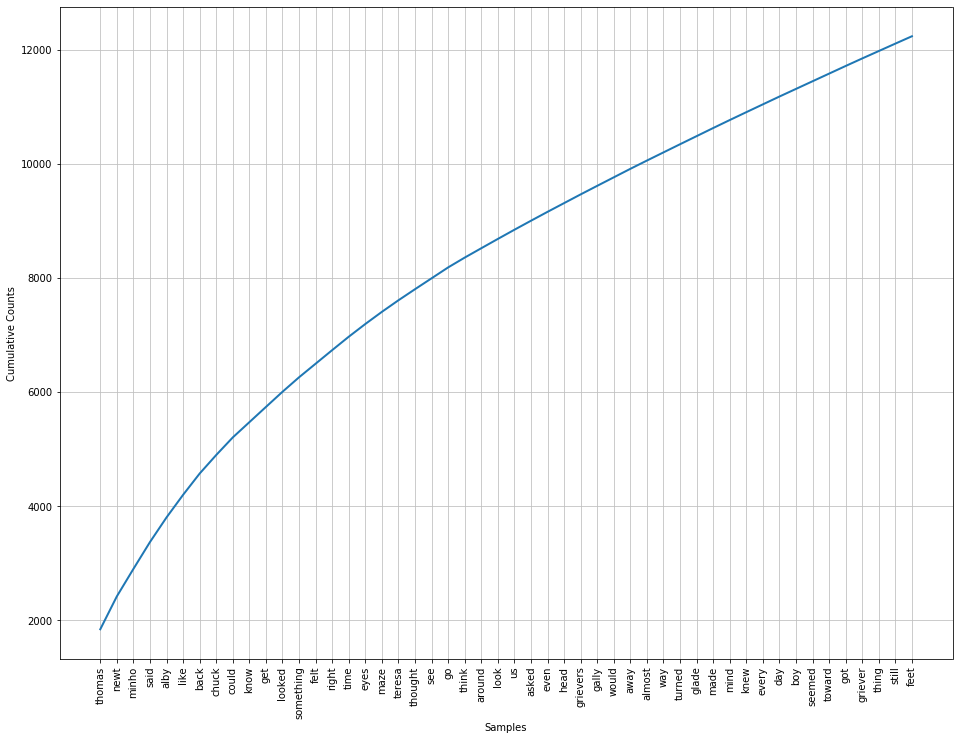

In [102]:
fig, ax = plt.subplots(figsize=(16,12))
ax = dist.plot(50, cumulative=True)

**Now We'll start using scikit-learn's CountVectorizer class to transform our corpus into a sparse bag of words representation. CountVectorizer expects as input a list of raw strings containing the documents in the corpus. It takes care of tokenization, transformation to lowercase, filtering stop words, building the vocabulary etc. It also tabulates occurrance counts per document for each feature.**

In [103]:
import numpy as np  # a conventional alias
from sklearn.feature_extraction.text import CountVectorizer

In [104]:
filename = ['the_maze_runner.txt']      
                                                             
vectorizer = CountVectorizer(input='filename', stop_words='english')               
dtm = vectorizer.fit_transform(filename)  # a sparse matrix 

In [105]:
vocab_list = vectorizer.get_feature_names()
vectorizer.vocabulary_

{'chapter': 772,
 'began': 415,
 'new': 3285,
 'life': 2875,
 'standing': 4874,
 'surrounded': 5089,
 'cold': 924,
 'darkness': 1251,
 'stale': 4870,
 'dusty': 1562,
 'air': 141,
 'metal': 3117,
 'ground': 2244,
 'lurching': 2995,
 'shudder': 4503,
 'shook': 4460,
 'oor': 3415,
 'beneath': 437,
 'fell': 1852,
 'sudden': 5044,
 'movement': 3212,
 'shu': 4496,
 'ed': 1593,
 'backward': 333,
 'hands': 2314,
 'feet': 1850,
 'drops': 1535,
 'sweat': 5115,
 'beading': 386,
 'forehead': 1966,
 'despite': 1351,
 'cool': 1066,
 'struck': 5003,
 'hard': 2329,
 'wall': 5640,
 'slid': 4606,
 'hit': 2419,
 'corner': 1075,
 'room': 4167,
 'sinking': 4544,
 'pulled': 3828,
 'legs': 2849,
 'tight': 5299,
 'body': 524,
 'hoping': 2457,
 'eyes': 1779,
 'soon': 4721,
 'adjust': 105,
 'jolt': 2702,
 'jerked': 2684,
 'upward': 5549,
 'like': 2892,
 'old': 3404,
 'lift': 2878,
 'shaft': 4406,
 'harsh': 2335,
 'sounds': 4737,
 'chains': 759,
 'pulleys': 3829,
 'workings': 5832,
 'ancient': 174,
 'steel': 491

**Did you notice !!!!!!!!!!!!!**

Every punctuation and article gone. Even the words are in lowercase.

In [106]:
dtm

<1x5898 sparse matrix of type '<class 'numpy.int64'>'
	with 5898 stored elements in Compressed Sparse Row format>

In [107]:
dtm.toarray()

array([[1, 1, 1, ..., 2, 1, 1]])

In [108]:
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer()
X_hash = hv.transform(filename)
X_hash

<1x1048576 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

**Here we use TD-IDF weighting to balance out the weight between frequent and infrequent words.**

In [109]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
tfidf

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [110]:
X_weighted = tfidf.fit_transform(dtm)
X_weighted.toarray()

array([[0.00037382, 0.00037382, 0.00037382, ..., 0.00074764, 0.00037382,
        0.00037382]])

**With our LDA model we can now examine the words that most contribute to each topic**

In [111]:
from gensim import corpora, models, similarities, matutils

# create the corpus using a conversion utility
gensim_corpus = matutils.Sparse2Corpus(X_weighted)

# build the LDA model
lda = models.LdaModel(gensim_corpus, num_topics=100)
lda

In [112]:
from gensim.models import Word2Vec
data = [] 
  
# iterate through each sentence in the file 
for i in sent_tokenize(text): 
    temp = [] 
      
    # tokenize the sentence into words 
    for j in word_tokenize(i): 
        temp.append(j.lower()) 
  
    data.append(temp) 

model = Word2Vec(data, min_count = 1, size = 100, window = 5)

**We now have a trained word2vec model.**

Now, every word in the vocabulary has a vector representation!

In [113]:
data

[['chapter',
  '1',
  'he',
  'began',
  'his',
  'new',
  'life',
  'standing',
  'up',
  ',',
  'surrounded',
  'by',
  'cold',
  'darkness',
  'and',
  'stale',
  ',',
  'dusty',
  'air',
  '.'],
 ['metal',
  'ground',
  'against',
  'metal',
  ';',
  'a',
  'lurching',
  'shudder',
  'shook',
  'the',
  'oor',
  'beneath',
  'him',
  '.'],
 ['he',
  'fell',
  'down',
  'at',
  'the',
  'sudden',
  'movement',
  'and',
  'shu',
  'ed',
  'backward',
  'on',
  'his',
  'hands',
  'and',
  'feet',
  ',',
  'drops',
  'of',
  'sweat',
  'beading',
  'on',
  'his',
  'forehead',
  'despite',
  'the',
  'cool',
  'air',
  '.'],
 ['his',
  'back',
  'struck',
  'a',
  'hard',
  'metal',
  'wall',
  ';',
  'he',
  'slid',
  'along',
  'it',
  'until',
  'he',
  'hit',
  'the',
  'corner',
  'of',
  'the',
  'room',
  '.'],
 ['sinking',
  'to',
  'the',
  'oor',
  ',',
  'he',
  'pulled',
  'his',
  'legs',
  'up',
  'tight',
  'against',
  'his',
  'body',
  ',',
  'hoping',
  'his',
  'ey

In [114]:
all_sentences = nltk.sent_tokenize(processed_text)

all_words = [nltk.word_tokenize(sent) for sent in all_sentences]

# Removing Stop Words
from nltk.corpus import stopwords
for i in range(len(all_words)):
    all_words[i] = [w for w in all_words[i] if w not in stopwords.words('english')]

    
all_words

[['chapter',
  'began',
  'new',
  'life',
  'standing',
  'surrounded',
  'cold',
  'darkness',
  'stale',
  'dusty',
  'air',
  'metal',
  'ground',
  'metal',
  'lurching',
  'shudder',
  'shook',
  'oor',
  'beneath',
  'fell',
  'sudden',
  'movement',
  'shu',
  'ed',
  'backward',
  'hands',
  'feet',
  'drops',
  'sweat',
  'beading',
  'forehead',
  'despite',
  'cool',
  'air',
  'back',
  'struck',
  'hard',
  'metal',
  'wall',
  'slid',
  'along',
  'hit',
  'corner',
  'room',
  'sinking',
  'oor',
  'pulled',
  'legs',
  'tight',
  'body',
  'hoping',
  'eyes',
  'would',
  'soon',
  'adjust',
  'darkness',
  'another',
  'jolt',
  'room',
  'jerked',
  'upward',
  'like',
  'old',
  'lift',
  'mine',
  'shaft',
  'harsh',
  'sounds',
  'chains',
  'pulleys',
  'like',
  'workings',
  'ancient',
  'steel',
  'factory',
  'echoed',
  'room',
  'bouncing',
  'walls',
  'hollow',
  'tinny',
  'whine',
  'lightless',
  'elevator',
  'swayed',
  'back',
  'forth',
  'ascended

And since we're dealing with vectors, it's possible to compare words using method such as similarity.

In [115]:
model.wv.similarity('thomas', 'gally')

0.99445474

In [116]:
model.wv.similarity('thomas', 'potato')

0.9014312

In [117]:
model.wv.most_similar(positive=["thomas"])

[('alby', 0.9989978075027466),
 ('shouted', 0.9979699850082397),
 ('chuck', 0.997825562953949),
 ('newt', 0.9977825880050659),
 ('minho', 0.9976433515548706),
 ('replied', 0.9972859621047974),
 ('man', 0.996529221534729),
 ('answered', 0.9953299760818481),
 ('thanks', 0.99524986743927),
 ('clint', 0.9951521158218384)]

**Let's see if there's a way to visualize some of the information captured by the model.** 

Since the vectors are high-dimensional we can't visualize them directly, but we can apply a dimension reduction technique like PCA and use the first two principal components as coordinates. We can try this with a group of words that should be somewhat similar, such as characters.

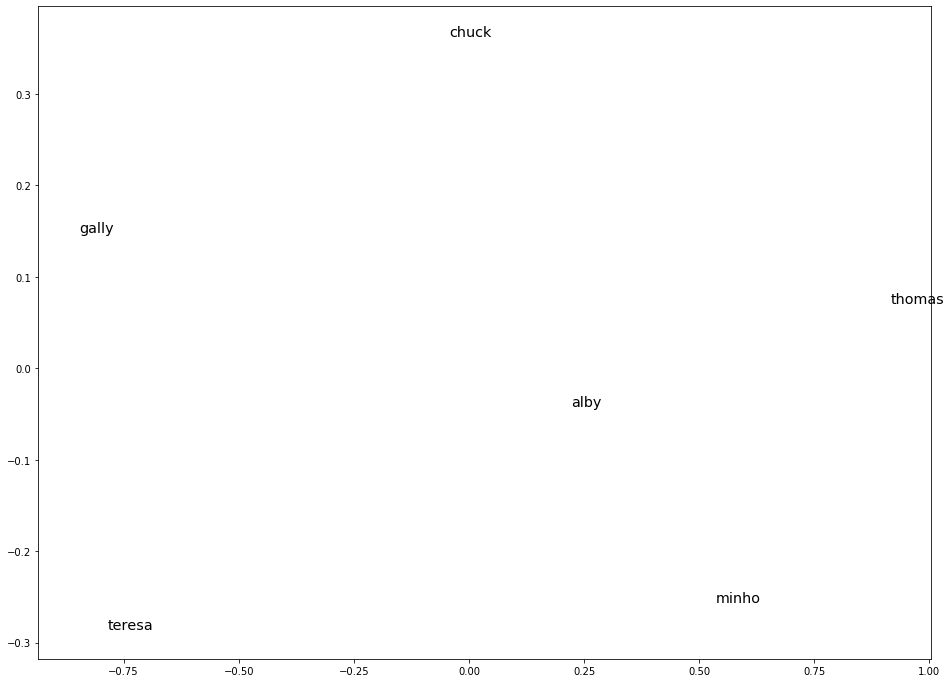

In [118]:
from sklearn.decomposition import PCA

#words = all_words
words = ['thomas', 'minho', 'alby','chuck', 'gally', 'teresa']
word_vectors = [model[word] for word in words]

# create and apply PCA transform
pca = PCA(n_components=2)
principal_components = pca.fit_transform(word_vectors)

# slice the 2D array
x = principal_components[:, 0]
y = principal_components[:, 1]

# plot with text annotation
fig, ax = plt.subplots(figsize=(16,12))
ax.scatter(x, y, s=0)

for i, label in enumerate(words):
    ax.annotate(label, (x[i], y[i]), size='x-large')

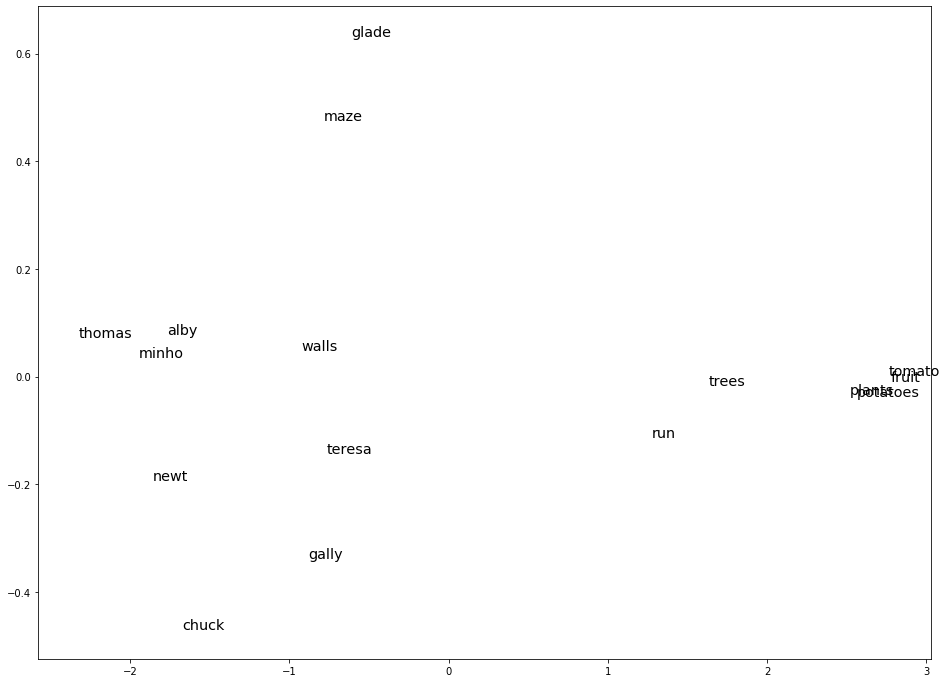

In [170]:
from sklearn.decomposition import PCA

#words = all_words
words = ['thomas', 'minho', 'alby', 'fruit', 'trees', 'walls', 'run', 'potatoes','newt','chuck', 'gally', 'maze', 'glade', 'teresa', 'tomato', 'plants']
word_vectors = [model[word] for word in words]

# create and apply PCA transform
pca = PCA(n_components=2)
principal_components = pca.fit_transform(word_vectors)

# slice the 2D array
x = principal_components[:, 0]
y = principal_components[:, 1]

# plot with text annotation
fig, ax = plt.subplots(figsize=(16,12))
ax.scatter(x, y, s=0)

for i, label in enumerate(words):
    ax.annotate(label, (x[i], y[i]), size='x-large')

# Part 2: PageRank and WordCloud

In [145]:
from gensim.models import Word2Vec
temp = [] 
  
# iterate through each sentence in the file 
for i in sent_tokenize(text): 
    temp.append(i)
    
    
temp

['chapter 1 he began his new life standing up, surrounded by cold darkness and stale, dusty air.',
 'metal ground against metal; a lurching shudder shook the oor beneath him.',
 'he fell down at the sudden movement and shu ed backward on his hands and feet, drops of sweat beading on his forehead despite the cool air.',
 'his back struck a hard metal wall; he slid along it until he hit the corner of the room.',
 'sinking to the oor, he pulled his legs up tight against his body, hoping his eyes would soon adjust to the darkness.',
 'with another jolt, the room jerked upward like an old lift in a mine shaft.',
 'harsh sounds of chains and pulleys, like the workings of an ancient steel factory, echoed through the room, bouncing off the walls with a hollow, tinny whine.',
 'the lightless elevator swayed back and forth as it ascended, turning the boy’s stomach sour with nausea; a smell like burnt oil invaded his senses, making him feel worse.',
 'he wanted to cry, but no tears came; he could

In [146]:
sent = np.array(temp)

In [147]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# Vectorise the data
vec = TfidfVectorizer()
X = vec.fit_transform(temp) # `X` will now be a TF-IDF representation of the data, the first row of `X` corresponds to the first sentence in `data`

# Calculate the pairwise cosine similarities (depending on the amount of data that you are going to have this could take a while)
S = cosine_similarity(X)
S

array([[1.        , 0.        , 0.09084072, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.00940362, ..., 0.        , 0.01414275,
        0.        ],
       [0.09084072, 0.00940362, 1.        , ..., 0.        , 0.06425242,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.01414275, 0.06425242, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [148]:
S.shape

(7582, 7582)

In [149]:
import networkx as nx
import numpy as np
from scipy import sparse
import scipy.sparse.linalg

**Since we divide by a lot of numbers, some of which can be zero, we use a numpy capability, which can be very dangerous, but also useful sometimes: np.seterr(divide='ignore').
In just two lines of python, we obtain degrees, and build a diagonal matrix with each  (𝑖,𝑖)
  node containing the inverse of the out-degree for that node:**

In [150]:
np.seterr(divide='ignore')  # ignore division-by-zero errors

degrees = np.ravel(S.sum(axis=1))
Deginv = sparse.diags(1 / degrees).tocsr()

**And now compute the transition matrix in the way below, because mutliplying a matrix by a diagonal matrix of factors will mutliply each entry in the matrix by its associated factor:**

In [152]:
Trans = (Deginv @ S).T
Trans

array([[7.55583189e-03, 0.00000000e+00, 3.68881478e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.28486548e-02, 3.81857369e-05, ...,
        0.00000000e+00, 5.32226526e-05, 0.00000000e+00],
       [6.86377231e-04, 1.20823822e-04, 4.06075014e-03, ...,
        0.00000000e+00, 2.41797734e-04, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.05038338e-02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.81715279e-04, 2.60913025e-04, ...,
        0.00000000e+00, 3.76324708e-03, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.80647913e-02]])

Depending on the structure and size of a linear algebra
problem, though, it might be more efficient to use an iterative solver. See
the `scipy.sparse.linalg` [documentation](http://docs.scipy.org/doc/scipy/reference/sparse.linalg.html#solving-linear-problems)
for more information on iterative solvers.

In [153]:
from scipy.sparse.linalg import spsolve

n= 7582
damping = 0.85
beta = 1 - damping

I = sparse.eye(n, format='csc')  # Same sparse format as Trans

pagerank = spsolve(I - damping * Trans,
                   np.full(n, beta / n))

/Applications/anaconda3/envs/deepgamit/lib/python3.7/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


### The Power Method
We know from the [Perron-Frobenius theorem](https://en.wikipedia.org/wiki/Perron%E2%80%93Frobenius_theorem),
that a stochastic matrix has 1 as an eigenvalue, and that this is its *largest* eigenvalue (the corresponding
eigenvector is the dominant or PageRank vector). What this means is that, whenever we
multiply *any* vector $v$ by $M$, the component of $v$ pointing towards the dominant
eigenvector stays the same, while *all other components shrink* by a
multiplicative factor. 

The corollary is that if we multiply some random
starting vector by $M$ repeatedly, we should eventually get the PageRank
vector since all other components will eventually shrink to zero!

SciPy makes this very efficient with its sparse matrix module:

In [154]:
def power(M, damping=0.85, max_iter=10**5):
    n = M.shape[0]
    r0 = np.full(n, 1/n)
    r = r0
    for _iter_num in range(max_iter):
        rnext = damping * M @ r + (1 - damping) / n
        if np.allclose(rnext, r):
            break
        r = rnext
    return r

In [155]:
def power2(M, damping=0.85, max_iter=10**5):
    n = M.shape[0]
    dangling = (1/n) * np.ravel(M.sum(axis=0) == 0)
    r0 = np.full(n, 1/n)
    r = r0
    for _ in range(max_iter):
        rnext = (damping * (M @ r + dangling @ r) +
                 (1 - damping) / n)
        if np.allclose(rnext, r):
            return rnext
        else:
            r = rnext
    return r

To verify that these three methods all give the same ranking for the
nodes. `numpy.corrcoef` might be a useful function for this.

`np.corrcoef` gives the **Pearson correlation** coefficient between
all pairs of a list of vectors. This coefficient will be equal to 1 if and only
if two vectors are scalar multiples of each other. Therefore, a correlation
coefficient of 1 is sufficient to show that the above methods produce the same
ranking.

In [156]:
pagerank_power = power(Trans)
pagerank_power2 = power2(Trans)
np.corrcoef([pagerank, pagerank_power, pagerank_power2])

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [157]:
list_sent =[]
list_rank = []
for i, (p,pr, prp, prp2) in enumerate(zip(sent, pagerank, pagerank_power, pagerank_power2)):
    print(i, p, pr, prp, prp2, prp/prp2)
    
    list_sent.append(p)
    list_rank.append(prp)

0 chapter 1 he began his new life standing up, surrounded by cold darkness and stale, dusty air. 9.845453598743003e-05 9.8454528087937e-05 9.845453076661235e-05 0.9999999727927672
1 metal ground against metal; a lurching shudder shook the oor beneath him. 6.559096061769269e-05 6.559095621659558e-05 6.559095781315823e-05 0.9999999756587996
2 he fell down at the sudden movement and shu ed backward on his hands and feet, drops of sweat beading on his forehead despite the cool air. 0.00016487085790281458 0.0001648708419863248 0.00016487084753560519 0.9999999663416519
3 his back struck a hard metal wall; he slid along it until he hit the corner of the room. 0.00018094655839570088 0.0001809465376640243 0.00018094654503065987 0.9999999592883325
4 sinking to the oor, he pulled his legs up tight against his body, hoping his eyes would soon adjust to the darkness. 0.00017686992490565295 0.00017686990601713983 0.00017686991273682556 0.9999999620077512
5 with another jolt, the room jerked upward l

364 don’t wanna get stung, do ya?” there was that word again. 0.00012693163179304564 0.0001269316170889071 0.00012693162232802583 0.9999999587248738
365 stung. 3.084380072922797e-05 3.0843799578283706e-05 3.0843799985332836e-05 0.9999999868028865
366 thomas tried not to think about it and pointed up the stairs, from where the moans of the sick kid echoed through the building. 0.0002359927362638449 0.00023599271937729263 0.00023599272537176428 0.9999999745989134
367 “if newt went up there, then i wanna talk to him.” the boy said nothing, stared at thomas for several seconds. 0.00020883859215131397 0.0002088385678959589 0.00020883857650186158 0.9999999587916043
368 then he shook his head. 0.00014393859854644302 0.00014393858303216628 0.00014393858843196684 0.9999999624853861
369 “you know what? 0.0001534966828420798 0.00015349666064529136 0.00015349666846869344 0.999999949032105
370 you’re right, tommy—i shouldn’t be so mean to newbies. 0.0001138051695300993 0.00011380515687089431 0.0001

614 the angle of vision from the window protected him for the moment, but he knew he and chuck would be seen if whoever was in there pushed his head outside to get a better look. 0.0002591861464117021 0.0002591861183303515 0.0002591861283003351 0.9999999615334985
615 “who’s that!” yelled the boy from the bathroom, his voice scratchy and laced with anger. 0.00015523843882878885 0.00015523842516031552 0.00015523842998613161 0.9999999689135216
616 thomas had to hold in a gasp when he realized it was gally—he knew that voice already. 0.0002095505727998264 0.00020955054482458914 0.00020955055477718851 0.9999999525050202
617 without warning, chuck suddenly popped his head up toward the window and screamed at the top of his lungs. 0.00017421046512497285 0.00017421044852854333 0.00017421045434497012 0.9999999666126421
618 a loud crash from inside revealed that the trick had worked—and the litany of swearwords following it let them know gally was none too happy about it. 0.00017229775605714652 

864 “gardens—where we grow the crops. 7.505363629147002e-05 7.505363049489192e-05 7.505363260062653e-05 0.9999999719436017
865 water’s pumped in through pipes in the ground—always has been, or we’d have starved to death a long time ago. 0.00012350803637605937 0.00012350802387783762 0.0001235080283250749 0.9999999639923223
866 never rains here. 4.270884241433653e-05 4.270883905782577e-05 4.27088402370645e-05 0.9999999723888842
867 never.” he pointed to the southeast corner, at the animal pens and barn. 0.00014954157274876942 0.00014954155839100742 0.0001495415634518412 0.9999999661576777
868 “blood house—where we raise and slaughter animals.” he pointed at the pitiful living quarters. 0.00010123872708083348 0.00010123871794606132 0.00010123872115880763 0.9999999682656372
869 “homestead—stupid place is twice as big than when the first of us got here because we keep addin’ to it when they send us wood and klunk. 0.00015819389559056934 0.00015819388013829525 0.00015819388564094504 0.999999

1114 a girl? 3.8216003853043415e-05 3.82160015661852e-05 3.821600237278735e-05 0.999999978893602
1115 he hadn’t even thought about why the glade only had boys, no girls. 0.0001447740568501324 0.00014477404095461797 0.00014477404659021264 0.9999999610731702
1116 hadn’t even had the chance to notice, really. 0.00011450226187504663 0.00011450224997247986 0.00011450225422055853 0.9999999628996067
1117 who is she? 7.628762620074665e-05 7.628761711700317e-05 7.628762032114033e-05 0.9999999579992513
1118 he wondered. 8.820089149035273e-05 8.820088041620316e-05 8.820088432452827e-05 0.9999999556883682
1119 why— newt shushed them again. 7.659529082445331e-05 7.659528434963834e-05 7.659528658889156e-05 0.9999999707651304
1120 “that’s not bloody half of it,” he said, then pointed down into the box. 0.0002122014337840527 0.00021220140907345593 0.0002122014177930199 0.9999999589090212
1121 “i think she’s dead.” a couple of boys grabbed some ropes made from ivy vines and lowered alby and newt into t

1447 words were etched on the glass; thomas could barely read them: let this half-shank be a warning to all: you can’t escape through the box hole. 0.00017673079668456006 0.00017673077679521273 0.00017673078388817854 0.9999999598657028
1448 thomas felt the odd urge to snicker—it seemed too ridiculous to be true. 0.0001491275655129776 0.00014912754991695427 0.0001491275555019049 0.9999999625491707
1449 but he was also disgusted with himself for being so shallow and glib. 0.00012609151020002757 0.0001260914965083667 0.0001260915012910984 0.9999999620693573
1450 shaking his head, he had stepped aside to read more names of the dead when another twig broke, this time straight in front of him, right behind the trees on the other side of the graveyard. 0.00022637485773152868 0.00022637483452943365 0.00022637484280324315 0.9999999634508437
1451 then another snap. 5.046242746295096e-05 5.046242300589605e-05 5.046242456251919e-05 0.9999999691528271
1452 then another. 6.553700163301515e-05 6.5536

1697 “but not today.” “what do you mean?” thomas dared to hope for information. 0.00014887958702343703 0.00014887957035729105 0.00014887957625038542 0.9999999604170396
1698 an answer, he thought. 0.00010249697750313199 0.00010249696388492076 0.00010249696869466931 0.9999999530742362
1699 please just give me an answer! 7.321760566973675e-05 7.32175976740726e-05 7.321760049508847e-05 0.999999961470796
1700 “just wait till the fancy admiral gets back. 7.250594501769067e-05 7.250593856004926e-05 7.250594086256673e-05 0.9999999682437405
1701 i don’t like saying stuff twice. 5.685612432344552e-05 5.685611922699121e-05 5.685612101031989e-05 0.999999968634359
1702 plus, he might not want you to hear it anyway.” thomas sighed. 0.00015564168732752441 0.00015564166771377369 0.0001556416746281522 0.9999999555750184
1703 he wasn’t in the least bit surprised at the non-answer. 0.00014423118334223485 0.0001442311671687442 0.00014423117291981487 0.9999999601260215
1704 “well, at least tell me why you 

1987 but he remained still, despite an odd urge to apologize and change the subject; he wanted to know everything about them. 0.00017240611251601455 0.00017240609270392248 0.00017240609966452035 0.9999999596267308
1988 even after what he’d seen last night, even after witnessing the griever through the window, he wanted to know. 0.00017953462823510794 0.00017953460574769828 0.00017953461373499508 0.9999999555111038
1989 the pull to know was strong, and he didn’t quite understand why. 0.00016416074046171004 0.00016416072384725733 0.00016416072966978897 0.9999999645315195
1990 becoming a runner just felt like something he was born to do. 0.00014084171327582274 0.00014084169771822223 0.00014084170323623506 0.9999999608211723
1991 newt had paused, looking confused. 7.799273111870545e-05 7.799272196865722e-05 7.79927251728143e-05 0.9999999589172314
1992 “the runners? 0.00010357117242090674 0.00010357116413492383 0.00010357116713316842 0.9999999710513585
1993 why?” “just wondering.” newt gave

2203 “where are they?” newt said, his voice thin and strained. 0.00012957050738220778 0.00012957049665565047 0.00012957050038331355 0.999999971230619
2204 thomas was touched that newt cared so much about alby and minho—as if they were his own kin. 0.000190979579302523 0.00019097955861527432 0.0001909795659181407 0.9999999617610066
2205 “why don’t we send out a search party?” he suggested again. 8.987670039866782e-05 8.987669141497751e-05 8.987669459039138e-05 0.9999999646692184
2206 it seemed so stupid to sit here and worry themselves to death when they could go out there and find them. 0.00018643620216650194 0.00018643618396130854 0.00018643619031954444 0.9999999658959138
2207 “bloody he—” newt started before stopping himself; he closed his eyes for a second and took a deep breath. 0.00016144479443525034 0.00016144477945338233 0.00016144478456192368 0.9999999683573466
2208 “we can’t. 9.000354973083305e-05 9.000354137406974e-05 9.000354439894122e-05 0.9999999663916405
2209 okay? 3.7439

2521 his hands began to slip and slide on the vines. 0.00013143542273737373 0.00013143541112205592 0.00013143541518030526 0.9999999691236237
2522 his feet ached from pressing into the stone cracks. 9.439003383955309e-05 9.439002648816902e-05 9.439002913242542e-05 0.9999999719858504
2523 the sounds grew louder—the awful, awful sounds. 7.579346365636396e-05 7.579346100838546e-05 7.579346202665245e-05 0.9999999865652398
2524 still thomas worked. 7.057216281590686e-05 7.057215532000534e-05 7.057215798647826e-05 0.9999999622163613
2525 when they’d reached a spot about thirty feet off the ground, thomas stopped, swaying on the vine he’d tied around his chest. 0.00016313884580524177 0.0001631388279257229 0.00016313883429101505 0.9999999609823609
2526 using his drained, rubbery arms, he turned himself around to face the maze. 0.00013225730058350025 0.00013225729003521914 0.00013225729367640504 0.9999999724689217
2527 an exhaustion he’d not known possible filled every tiny particle of his body.

2732 the corridor didn’t end in another stone wall. 0.00010778768528463857 0.00010778767384641132 0.00010778767791768098 0.9999999622288026
2733 it ended in blackness. 8.192777938247451e-05 8.192776989457502e-05 8.192777326371343e-05 0.9999999588767242
2734 thomas narrowed his eyes as they ran toward the wall of darkness, trying to comprehend what they were approaching. 0.00017725777593928036 0.00017725775922533923 0.00017725776523492816 0.9999999660968932
2735 the two ivy-covered walls on either side of him seemed to intersect with nothing but sky up ahead. 0.00015202360790206665 0.0001520235908978027 0.00015202359692524487 0.9999999603519303
2736 he could see stars. 8.649188847821312e-05 8.649187771160566e-05 8.649188151684062e-05 0.9999999560047151
2737 as they got closer, he finally realized that it was an opening—the maze ended. 0.00017604364431897634 0.00017604362486785282 0.00017604363182120594 0.9999999605021036
2738 how? 5.332842207570077e-05 5.332841720441644e-05 5.3328418918

3030 what’re you talking about?” newt stood, stretched his arms. 0.00014244997866327998 0.00014244996410782402 0.00014244996909058128 0.9999999650210014
3031 “turned this whole place upside down, you bloody shank. 8.461282542052049e-05 8.461281645229349e-05 8.46128195994543e-05 0.9999999628051538
3032 half the gladers think you’re god, the other half wanna throw your butt down the box hole. 0.00013259641856921525 0.00013259640508511762 0.00013259640989161508 0.9999999637509231
3033 lotta stuff to talk about.” “like what?” thomas didn’t know which was more unsettling—that people thought he was some kind of hero, or that some wished he didn’t exist. 0.00019179636345088597 0.00019179633671011402 0.00019179634616622583 0.9999999506971222
3034 “patience,” newt said. 8.677638125839201e-05 8.677639152774132e-05 8.677638471510927e-05 1.0000000785079037
3035 “you’ll find out after the wake-up.” “tomorrow? 0.0001327812529727199 0.00013278123757642536 0.00013278124303772317 0.9999999588699602
303

3363 minho has a lot of training to give you.” it hadn’t really hit thomas until then. 0.0001549042653473028 0.00015490424678526486 0.0001549042533542777 0.9999999575930765
3364 he was going to be a runner, explore the maze. 0.00017269762124427114 0.00017269760254731814 0.0001726976092187048 0.9999999613695482
3365 despite everything, he felt a shiver of excitement; he was sure they could avoid getting trapped out there at night again. 0.00015441819261894027 0.0001544181746151453 0.0001544181809918116 0.9999999587052104
3366 maybe he’d had his one and only turn of bad luck. 0.0001634508783983134 0.00016345086501463876 0.00016345086974570042 0.9999999710551455
3367 “what about my punishment?” “tomorrow,” newt answered. 8.365954059837762e-05 8.365953052374202e-05 8.365953405836579e-05 0.999999957749899
3368 “the wake-up till sunset.” one day, thomas thought. 0.00011973599229298335 0.00011973597856693757 0.0001197359834506093 0.9999999592129986
3369 that won’t be so bad. 8.762023499384465

3613 “but i did feel like i’d been here before when i first got here.” he looked at newt, hoping to see some sort of recognition in his eyes. 0.00019519833866597176 0.00019519831329881107 0.0001951983222333217 0.999999954228548
3614 “anyone else go through that?” but newt’s face was blank. 0.00012305629576118054 0.00012305627897074052 0.0001230562848896548 0.9999999519007559
3615 he simply rolled his eyes. 0.00010275974375851991 0.00010275973158242096 0.00010275973585703198 0.9999999584018878
3616 “uh, no, tommy. 4.7462202972060736e-05 4.746219876340076e-05 4.7462200237215955e-05 0.9999999689476006
3617 most of us spent a week klunkin’ our pants and bawlin’ our eyes out.” “yeah, well.” thomas paused, upset and suddenly embarrassed. 0.0001038619250640133 0.00010386191756300804 0.00010386192011601809 0.9999999754191907
3618 what did it all mean? 0.0001369480552607611 0.00013694803538476436 0.00013694804244851564 0.99999994842021
3619 was he different from everyone else somehow? 0.0001085

3902 after passing some pieces of chicken and a glass of water through the window, he took up his usual role of talking thomas’s ear off. 0.00015932550871526093 0.0001593254925841191 0.00015932549826185355 0.9999999643639309
3903 “everything’s getting back to normal,” the boy announced. 0.00010559986238694376 0.00010559985217053257 0.00010559985581350779 0.9999999655020815
3904 “the runners are out in the maze, everyone’s working—maybe we’ll survive after all. 0.0001607830728519925 0.00016078305633340033 0.0001607830622176084 0.9999999634028113
3905 still no sign of gally— newt told the runners to come back lickety-splickety if they found his body. 0.0001596024764318274 0.0001596024597792267 0.00015960246569915194 0.9999999629083096
3906 and, oh, yeah—alby’s up and around. 0.0001449297762022193 0.00014492976732978914 0.00014492977021647444 0.9999999800821784
3907 seems fine—and newt’s glad he doesn’t have to be the big boss anymore.” the mention of alby pulled thomas’s attention from h

4195 the only thing even approaching an exit is the cliff, and that ain’t a very good one unless you like falling to a horrible death.” minho tapped the map. 0.0001831977082518194 0.00018319768915305804 0.00018319769589684881 0.999999963188452
4196 “the walls move all over the shuck place every evening—same time as our doors close shut. 0.00012925668405265627 0.00012925667131112763 0.00012925667585581425 0.9999999648398306
4197 at least, we think that’s when, because we never really hear walls moving any other time.” thomas looked up, happy to be able to offer a piece of information. 0.0001694702569172943 0.00016947023648734188 0.0001694702437745675 0.9999999569999697
4198 “i didn’t see anything move that night we got stuck out there.” “those main corridors right outside the doors don’t ever change. 0.0001289213919192403 0.00012892137693903673 0.00012892138227231539 0.999999958631543
4199 it’s just the ones a little deeper out.” “oh.” thomas returned to the crude map, trying to visuali

4435 thomas didn’t know what that meant, didn’t know how it was possible. 0.00017174402251625792 0.00017174399719752846 0.00017174400617181102 0.9999999477461674
4436 but he knew it to be true—it was the only explanation his rational mind could accept. 0.00020479770635910613 0.00020479768093474492 0.00020479769000520588 0.9999999557101402
4437 and it was obvious from the other gladers’ reactions that none of them had figured this out until now. 0.00018856518811219942 0.00018856516754670174 0.00018856517482629252 0.9999999613948293
4438 chuck found him, and the look of fear on the boy’s face pinched thomas’s heart. 0.00019194226636666233 0.0001919422468078179 0.0001919422537036244 0.9999999640735359
4439 “what do you think happened?” chuck said, a pitiful tremor in his voice, his eyes glued to the sky. 0.00018319209549890638 0.0001831920743884859 0.00018319208187906426 0.9999999591107962
4440 thomas thought his neck must hurt something awful. 9.63486904928117e-05 9.634867904267e-05 9.63

4696 the girl. 0.00011874620723909423 0.00011874619754194616 0.0001187462010368891 0.99999997056796
4697 the girl who spoke in his head. 0.00014352988418656125 0.00014352987042715235 0.00014352987527796912 0.9999999662034349
4698 he wanted to run before it happened again, before she spoke to him in his mind. 0.00019941809536406203 0.00019941806904941157 0.00019941807835366238 0.9999999533429923
4699 but it was too late. 0.00012283764932766926 0.00012283763216446343 0.00012283763826472267 0.999999950338843
4700 tom, i don’t know any of these people. 9.345978675487598e-05 9.345977771714053e-05 9.345978088034484e-05 0.999999966154379
4701 come get me! 7.519128122086451e-05 7.519127185044806e-05 7.519127517146624e-05 0.9999999558323998
4702 it’s all fading.... i’m forgetting everything but you.... i have to tell you things! 0.00015209747758279177 0.00015209745905957358 0.0001520974656490393 0.999999956676032
4703 but it’s all fading.... he couldn’t understand how she did it, how she was in

4977 yeah?” her hands slipped back inside, disappeared. 6.792495697154454e-05 6.79249565608287e-05 6.792495655646088e-05 1.0000000000643037
4978 all he could see were her eyes, the pale glow of her white skin. 0.00014830651223580844 0.00014830650091736758 0.0001483065048071688 0.9999999737718772
4979 “i don’t know if i can do this—stay in this jail all night.” thomas felt an incredible sadness. 0.00013281845064915752 0.00013281843632150168 0.00013281844139215846 0.9999999618226451
4980 he wanted to steal newt’s keys and help her escape. 0.00012498046613509633 0.00012498045604598067 0.00012498045944755938 0.9999999727831156
4981 but he knew that was a ridiculous idea. 0.00013764597463366158 0.00013764595438682558 0.0001376459615549269 0.9999999479236351
4982 she’d just have to suffer and make do. 0.00013210713164685746 0.0001321071221154653 0.00013210712548051933 0.9999999745278385
4983 he stared into those glowing eyes. 8.086867755956064e-05 8.086866814746737e-05 8.08686714654023e-05 0

5279 “teresa?” he asked. 0.00012661105631564504 0.00012661104780865422 0.00012661105055440644 0.9999999783134867
5280 her face appeared, hands rubbing her eyes. 6.406261763991234e-05 6.40626172846421e-05 6.406261722379716e-05 1.000000000949773
5281 “was anybody killed?” she asked, somewhat groggy. 6.027680806697153e-05 6.02768011122616e-05 6.02768035712816e-05 0.9999999592045388
5282 “were you sleeping?” thomas asked. 0.00012038910450672649 0.0001203890911069708 0.00012038909586632634 0.9999999604668887
5283 he was relieved to see that she appeared okay, felt himself relax. 0.00013998307461049963 0.00013998305688587128 0.0001399830631499654 0.999999955251057
5284 “i was,” she responded. 7.706717538533811e-05 7.70671657648299e-05 7.706716916534654e-05 0.9999999558759368
5285 “until i heard something shred the homestead to bits. 9.43715915515699e-05 9.437158248428498e-05 9.437158572585968e-05 0.9999999656509458
5286 what happened?” thomas shook his head in disbelief. 0.000132302381677882

5612 he and minho were stretching their legs by the west door when chuck walked over to say goodbye. 0.0001601397685908555 0.00016013975527304897 0.00016013975989393953 0.9999999711446391
5613 “i’d go with you,” the boy said in a far too jovial voice, “but i don’t wanna die a gruesome death.” thomas laughed, surprising himself. 0.00014375738454214064 0.0001437573679419821 0.00014375737379925376 0.9999999592558525
5614 “thanks for the words of encouragement.” “be careful,” chuck said, his tone quickly melting into genuine concern. 0.00011437630562172842 0.00011437629499777118 0.00011437629879296342 0.9999999668183681
5615 “i wish i could help you guys.” thomas was touched—he bet that if it really came down to it, chuck would go out there if he were asked to. 0.00024990262647329726 0.00024990259627234436 0.0002499026069384016 0.9999999573191438
5616 “thanks, chuck. 4.8031316308560786e-05 4.803131175796989e-05 4.803131336717898e-05 0.9999999664966669
5617 we’ll definitely be careful.” min

5946 he could see that where the front door had been there now stood a jagged hole leading out into the gray night. 0.00017498736058528422 0.00017498734099407026 0.0001749873480077424 0.9999999599189757
5947 he headed straight for it and ran out into the glade. 0.00018895808498888494 0.00018895806524618416 0.00018895807218904435 0.999999963257139
5948 tom! 3.219461696623437e-05 3.219461595430185e-05 3.219461630865831e-05 0.9999999889933008
5949 teresa screamed inside his head. 8.944442130514082e-05 8.944442144834076e-05 8.944442116457199e-05 1.000000003172571
5950 what are you doing! 0.0001092617476048912 0.00010926173379264168 0.00010926173865157725 0.9999999555293955
5951 he ignored her. 8.912619424894667e-05 8.912618886035902e-05 8.912619059958272e-05 0.9999999804858293
5952 he just kept running. 9.961436708307864e-05 9.961435450601792e-05 9.961435894503617e-05 0.999999955437968
5953 the griever holding dave—a kid thomas had never spoken to—was rolling along on its spikes toward the

6268 “over the cliff,” thomas answered. 0.00012061939180154397 0.00012061938004598422 0.00012061938421098007 0.9999999654699294
6269 “we have to go through the griever hole.” chapter 51 alby stood up so quickly his chair fell over backward. 0.00015478601527223857 0.00015478599852718436 0.0001547860044822842 0.9999999615268845
6270 his bloodshot eyes stood out against the white bandage on his forehead. 0.00012132680616274407 0.00012132679423443722 0.00012132679848336075 0.9999999649795133
6271 he took two steps forward before stopping, as if he’d been about to charge and attack thomas. 0.0001642172472549243 0.00016421723386604012 0.00016421723846582356 0.9999999719896432
6272 “now you’re being a shuck idiot,” he said, glaring at thomas. 0.00014476433059972495 0.00014476431225807934 0.0001447643187417704 0.9999999552120916
6273 “or a traitor. 3.438835885788432e-05 3.4388356787227634e-05 3.4388357517601234e-05 0.9999999787610211
6274 how can we trust a word you say if you helped design th

6529 eventually, they gave up and kept their distance. 8.816205336419013e-05 8.816204907227606e-05 8.816205058178732e-05 0.9999999828779927
6530 as for thomas and the rest of those committed to the escape, there was a ton of work to be done. 0.0002224465519716083 0.0002224465312701633 0.00022244653865875904 0.9999999667848474
6531 backpacks were handed out and stuffed full of supplies. 8.082704218830246e-05 8.082703732872575e-05 8.082703900087656e-05 0.9999999793119874
6532 frypan—newt told thomas that the cook had been one of the last keepers to agree to go—was in charge of gathering all the food and figuring out a way to distribute it evenly among the packs. 0.0002452036437580433 0.00024520361613907714 0.0002452036259329954 0.9999999600580202
6533 syringes of grief serum were included, even though thomas didn’t think the grievers would sting them. 0.00011406641070898103 0.00011406639993107658 0.0001140664037941952 0.9999999661327219
6534 chuck was in charge of filling water bottles a

6862 thomas felt his heart tremble, hoped it wasn’t someone he knew. 0.0001349224050871487 0.0001349223883640927 0.00013492239427918143 0.9999999561593258
6863 just keep going! 6.37617103976983e-05 6.376170353187863e-05 6.376170595822835e-05 0.9999999619465998
6864 teresa said. 9.321470676748149e-05 9.321470786593331e-05 9.321470721112738e-05 1.0000000070247062
6865 “i know!” thomas shouted back, this time out loud. 0.00012089043424533464 0.00012089041868698207 0.0001208904241877542 0.9999999544978674
6866 someone sprinted past thomas, bumped him. 6.938520483640865e-05 6.938519739592812e-05 6.93852000272611e-05 0.9999999620764518
6867 a griever charged in from the right, blades twirling. 9.260469745704989e-05 9.260468983376049e-05 9.260469258529883e-05 0.9999999702872688
6868 a glader cut it off, attacked it with two long swords, metal clacking and clanging as they fought. 0.0001107350957310033 0.00011073508662162382 0.000110735089842738 0.9999999709115314
6869 thomas heard a distant v

7195 thomas felt as if the world were collapsing around him, crushing his heart. 0.00015010067918141176 0.0001501006654848528 0.000150100670369484 0.9999999674576322
7196 he fell to the ground, pulled chuck’s shaking body into his arms. 0.0001620219879898775 0.00016202197326793384 0.00016202197837850545 0.999999968457541
7197 “chuck!” he screamed; his voice felt like acid ripping through his throat. 0.00012582534992649136 0.00012582533543965162 0.0001258253405216787 0.9999999596104643
7198 “chuck!” the boy shook uncontrollably, blood everywhere, wetting thomas’s hands. 8.796111233031438e-05 8.79611037080131e-05 8.796110677873281e-05 0.9999999650900288
7199 chuck’s eyes had rolled up in their sockets, dull white orbs. 8.501867359043101e-05 8.501866461601288e-05 8.501866780378359e-05 0.9999999625050499
7200 blood trickled out of his nose and mouth. 0.00010876246560192141 0.00010876245676787744 0.00010876245980783006 0.999999972049615
7201 “chuck ...,” thomas said, this time a whisper. 0.

7451 the woman and other rescuers shu ed the nineteen boys and one girl through the front door and up a ight of stairs, then into a huge dormitory with a series of bunk beds lined up along one of the walls. 0.00018154006480858336 0.0001815400489268093 0.00018154005448471123 0.9999999693847071
7452 on the opposite side were some dressers and tables. 9.953426412447992e-05 9.953425715366314e-05 9.95342595883484e-05 0.9999999755392236
7453 curtain-covered windows checkered each wall of the room. 7.761327060433456e-05 7.761326461946446e-05 7.761326676296811e-05 0.9999999723822519
7454 thomas took it all in with a distant and muted wonder—he was far past being surprised or overcome by anything ever again. 0.00015838283530673536 0.00015838281802907554 0.00015838282404527377 0.9999999620148317
7455 the place was full of color. 0.00012580517837606814 0.00012580516569880303 0.0001258051702262831 0.9999999640119714
7456 bright yellow paint, red blankets, green curtains. 2.6733647915857498e-05 2.6

In [158]:
data_pagerank = dict(zip(list_sent, list_rank))
data_pagerank

{'chapter 1 he began his new life standing up, surrounded by cold darkness and stale, dusty air.': 9.8454528087937e-05,
 'metal ground against metal; a lurching shudder shook the oor beneath him.': 6.559095621659558e-05,
 'he fell down at the sudden movement and shu ed backward on his hands and feet, drops of sweat beading on his forehead despite the cool air.': 0.0001648708419863248,
 'his back struck a hard metal wall; he slid along it until he hit the corner of the room.': 0.0001809465376640243,
 'sinking to the oor, he pulled his legs up tight against his body, hoping his eyes would soon adjust to the darkness.': 0.00017686990601713983,
 'with another jolt, the room jerked upward like an old lift in a mine shaft.': 8.490146441560671e-05,
 'harsh sounds of chains and pulleys, like the workings of an ancient steel factory, echoed through the room, bouncing off the walls with a hollow, tinny whine.': 0.0001239497827062036,
 'the lightless elevator swayed back and forth as it ascended,

In [159]:
pagerank_sort = sorted(data_pagerank.items(), key = lambda kv:(kv[1]))
pagerank_sort

[('confusion.', 2.658191261245956e-05),
 ('graveyard?', 2.661110291341424e-05),
 ('“leaving?', 2.6662470375424256e-05),
 ('buh-bump, buh-bump, buh-bump still alive.', 2.6679241595451835e-05),
 ('bright yellow paint, red blankets, green curtains.', 2.6733650060725e-05),
 ('hurry!', 2.688717472506829e-05),
 ('kids.', 2.6991016524216816e-05),
 ('aim high, hit low.', 2.7011313407095607e-05),
 ('waiting, watching.', 2.7023193595238953e-05),
 ('curiosity.', 2.7040679457047173e-05),
 ('stick together.', 2.7045441384077907e-05),
 ('“dig deeper.', 2.7190582626557618e-05),
 ('yesterday?', 2.719271940473251e-05),
 ('moist skin?', 2.7260579830381805e-05),
 ('“quit complaining.', 2.7265495872778017e-05),
 ('experiment.', 2.7424274387959355e-05),
 ('a beetle blade.', 2.7486440025901916e-05),
 ('panic.', 2.7509448529777234e-05),
 ('a pause.', 2.7526619005166115e-05),
 ('“great.', 2.7527655375398515e-05),
 ('“broken?', 2.7627302810718643e-05),
 ('impossible.', 2.7680357800899446e-05),
 ('“leave.', 2.7

In [165]:
import itertools
out= pagerank_sort[:750]
listSents = []
for i in range(0,750):
    listSents.append(out[i][0])
listSents

['confusion.',
 'graveyard?',
 '“leaving?',
 'buh-bump, buh-bump, buh-bump still alive.',
 'bright yellow paint, red blankets, green curtains.',
 'hurry!',
 'kids.',
 'aim high, hit low.',
 'waiting, watching.',
 'curiosity.',
 'stick together.',
 '“dig deeper.',
 'yesterday?',
 'moist skin?',
 '“quit complaining.',
 'experiment.',
 'a beetle blade.',
 'panic.',
 'a pause.',
 '“great.',
 '“broken?',
 'impossible.',
 '“leave.',
 'underneath lay a small trapdoor.',
 'serious?',
 '“grab those smelly suckers.',
 'everybody.',
 'i will.',
 'planted somehow?',
 'wait!',
 'brilliant, actually.',
 'catch.',
 'klunk.',
 'sixteen?',
 'emotions.',
 'sound promising?',
 'turn.',
 'pain.',
 '“feelings.',
 'tomorrow.',
 '“hungry?',
 'push.',
 'brains altered?',
 '“doesn’t matter.',
 '“fine.',
 'memories.',
 'totally gone.',
 'minutes.',
 'death.',
 'i guess.',
 'ready?',
 'comfortable.',
 'bye, tom.',
 '“different?',
 '“nasty bugger, eh?',
 'countless others stared.',
 'surprised.',
 'fear.',
 'actu

In [166]:
def listToString(s):  
    
    # initialize an empty string 
    str1 = ""  
    
    # traverse in the string   
    for ele in s:  
        str1 += ele   
    
    # return string   
    return str1  
        
Stringed = listToString(listSents)
print(Stringed) 

confusion.graveyard?“leaving?buh-bump, buh-bump, buh-bump still alive.bright yellow paint, red blankets, green curtains.hurry!kids.aim high, hit low.waiting, watching.curiosity.stick together.“dig deeper.yesterday?moist skin?“quit complaining.experiment.a beetle blade.panic.a pause.“great.“broken?impossible.“leave.underneath lay a small trapdoor.serious?“grab those smelly suckers.everybody.i will.planted somehow?wait!brilliant, actually.catch.klunk.sixteen?emotions.sound promising?turn.pain.“feelings.tomorrow.“hungry?push.brains altered?“doesn’t matter.“fine.memories.totally gone.minutes.death.i guess.ready?comfortable.bye, tom.“different?“nasty bugger, eh?countless others stared.surprised.fear.actually sleeping.six words.nasty.a button.blood house, gardens.hard.seriously.wicked.“shh, greenie.“order.order.please!please.float.scared?three.two lefts.whispery, sweet, confident.“whatever.i’m coming.newbie.“newbie.“am i ... replacing someone?stung.coming closer.seriously, i’m tired.“whoa.tw

### WordCLoud

For wordCloud what we have done is we have taken an image of a polygon and replace it with a string of words from our book. 

In [167]:
from PIL import *
wine_mask = np.array(Image.open("ipynb.images/polygon.jpeg"))

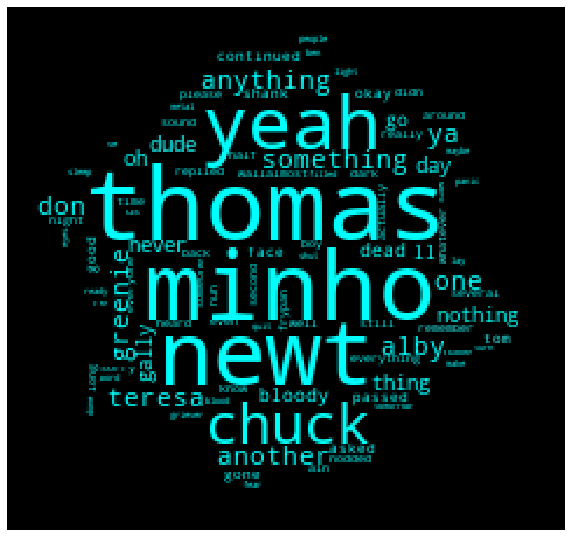

In [168]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 45.0 / 50.0)
    s = int(100.0 * 255.0 / 50.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 50.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

# file_content=open ("the_maze_runner.txt").read()

wordcloud = WordCloud(stopwords = STOPWORDS,
                            background_color = 'black',
                            mask=wine_mask,
                            width = 2000,
                            height = 1500,
                            color_func = random_color_func
                            ).generate(Stringed)

plt.figure( figsize=(10,20) )
plt.imshow(wordcloud)
plt.axis('off')

plt.show()

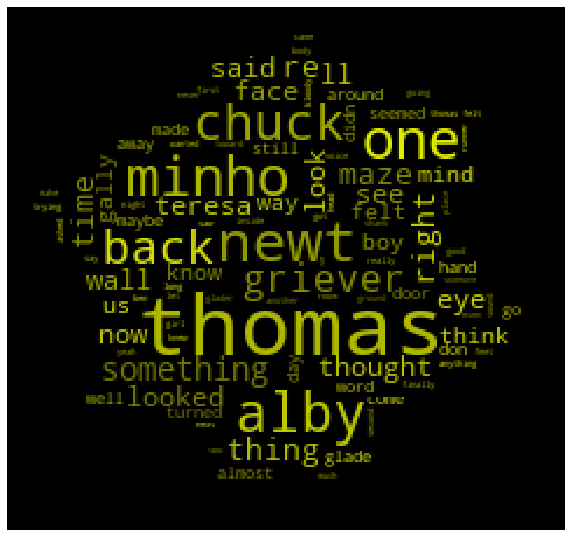

In [164]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 45.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

# file_content=open ("the_maze_runner.txt").read()

wordcloud = WordCloud(stopwords = STOPWORDS,
                            background_color = 'black',
                            mask=wine_mask,
                            width = 2000,
                            height = 1500,
                            color_func = random_color_func
                            ).generate(text)

plt.figure( figsize=(10,20) )
plt.imshow(wordcloud)
plt.axis('off')

plt.show()

## Part 3: LDA

In [171]:
from gensim.models import Word2Vec
data = [] 
  
# iterate through each sentence in the file 
for i in sent_tokenize(processed_sent): 
    temp = [] 
      
    # tokenize the sentence into words 
    for j in word_tokenize(i): 
        temp.append(j.lower()) 
  
    data.append(temp) 

model = Word2Vec(data, min_count = 1, size = 100, window = 5)

data

[['chapter',
  'he',
  'began',
  'his',
  'new',
  'life',
  'standing',
  'up',
  'surrounded',
  'by',
  'cold',
  'darkness',
  'and',
  'stale',
  'dusty',
  'air',
  '.'],
 ['metal',
  'ground',
  'against',
  'metal',
  'a',
  'lurching',
  'shudder',
  'shook',
  'the',
  'oor',
  'beneath',
  'him',
  '.'],
 ['he',
  'fell',
  'down',
  'at',
  'the',
  'sudden',
  'movement',
  'and',
  'shu',
  'ed',
  'backward',
  'on',
  'his',
  'hands',
  'and',
  'feet',
  'drops',
  'of',
  'sweat',
  'beading',
  'on',
  'his',
  'forehead',
  'despite',
  'the',
  'cool',
  'air',
  '.'],
 ['his',
  'back',
  'struck',
  'a',
  'hard',
  'metal',
  'wall',
  'he',
  'slid',
  'along',
  'it',
  'until',
  'he',
  'hit',
  'the',
  'corner',
  'of',
  'the',
  'room',
  '.'],
 ['sinking',
  'to',
  'the',
  'oor',
  'he',
  'pulled',
  'his',
  'legs',
  'up',
  'tight',
  'against',
  'his',
  'body',
  'hoping',
  'his',
  'eyes',
  'would',
  'soon',
  'adjust',
  'to',
  'the',
 

First we identify the frequent bigrams in the corpus, then we append them to the list of tokens for the documents in which they appear. This means the bigrams will not be in their correct position in the text, but that's fine: topic models are bag-of-word models that ignore word position anyway.

In [172]:
import re
from gensim.models import Phrases

bigram = Phrases(data, min_count=10)

for idx in range(len(data)):
    for token in bigram[data[idx]]:
        if '_' in token:  # bigrams can be recognized by the "_" that joins the invidual words
            data[idx].append(token)

Next, we move on to the final Gensim-specific preprocessing steps.
First, we create a dictionary representation of the documents. This dictionary will map each word to a unique ID and help us create bag-of-word representations of each document. These bag-of-word representations contain the ids of the words in the document, together with their frequency. Additionally, we can remove the least and most frequent words from the vocabulary. This improves the quality of our topic model and speeds up its training. The minimum frequency of a word is expressed as an absolute number, the maximum frequency is the proportion of documents a word is allowed to occur in.

In [173]:
from gensim.corpora import Dictionary

dictionary = Dictionary(data)
print('Number of unique words in original documents:', len(dictionary))

dictionary.filter_extremes(no_below=3, no_above=0.25)
print('Number of unique words after removing rare and common words:', len(dictionary))

print("Example representation of document 1:", dictionary.doc2bow(data[0]))

Number of unique words in original documents: 6279
Number of unique words after removing rare and common words: 2820
Example representation of document 1: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]


**Then we create bag-of-word representations for each document in the corpus:**

In [174]:
corpus = [dictionary.doc2bow(doc) for doc in data]

## Training
Now it's time to train our topic model. We do this with the following parameters:

- corpus: the bag-of-word representations of our documents
- id2token: the mapping from indices to words
- num_topics: the number of topics we want the model to identify
- chunksize: the number of documents the model sees for every update
- passes: the number of times we show the total corpus to the model during training
- random_state: we use a seed to ensure reproducibility.
- On a corpus of this size, the training will typically take one or two minutes.

In [175]:
from gensim.models import LdaModel

%time model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, chunksize=1000, passes=5, random_state=1)

CPU times: user 9.88 s, sys: 34.8 ms, total: 9.91 s
Wall time: 9.96 s


Let's take a look at what the model has learnt.

In [176]:
for (topic, words) in model.print_topics():
    print(topic+1, ":", words)

1 : 0.062*"her" + 0.035*"she" + 0.027*"thomas" + 0.026*"t" + 0.026*"a" + 0.025*"couldn" + 0.024*"couldn_t" + 0.023*"bus" + 0.018*"wanted" + 0.017*"his"
2 : 0.081*"t" + 0.058*"teresa" + 0.057*"i" + 0.033*"didn" + 0.033*"didn_t" + 0.030*"know" + 0.029*"it" + 0.027*"can" + 0.025*"don" + 0.024*"you"
3 : 0.024*"it" + 0.021*"they" + 0.020*"all" + 0.019*"that" + 0.019*"and" + 0.018*"was" + 0.018*"of" + 0.016*"what" + 0.016*"she" + 0.016*"s"
4 : 0.127*"his" + 0.033*"eyes" + 0.031*"thomas" + 0.026*"in" + 0.022*"mind" + 0.020*"and" + 0.017*"his_mind" + 0.017*"face" + 0.016*"s" + 0.015*"his_eyes"
5 : 0.056*"you" + 0.049*"we" + 0.033*"ll" + 0.023*"and" + 0.019*"i" + 0.018*"get" + 0.017*"our" + 0.017*"more" + 0.017*"us" + 0.016*"a"
6 : 0.045*"was" + 0.042*"a" + 0.040*"it" + 0.040*"thomas" + 0.038*"d" + 0.030*"of" + 0.025*"had" + 0.024*"he_d" + 0.023*"that" + 0.022*"for"
7 : 0.031*"re" + 0.024*"it" + 0.023*"you" + 0.021*"we" + 0.017*"were" + 0.017*"they" + 0.016*"would" + 0.014*"but" + 0.013*"we_re"

Another way of inspecting the topics is by visualizing them.
This can be done with the pyLDAvis library. PyLDAvis will show us how popular the topics are in our corpus, how similar the topics are, and which are the most salient words for this topic.

In [177]:
import pyLDAvis.gensim
import warnings

pyLDAvis.enable_notebook()
warnings.filterwarnings("ignore", category=DeprecationWarning) 

pyLDAvis.gensim.prepare(model, corpus, dictionary, sort_topics=False)

/Applications/anaconda3/envs/deepgamit/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.013699 -0.301864       1        1   5.941306
1      0.277317 -0.116218       2        1   8.301934
2      0.052175  0.028018       3        1  14.201750
3     -0.209063 -0.000509       4        1   8.087732
4      0.150565  0.181222       5        1   7.688108
5     -0.045705 -0.037517       6        1  10.527615
6      0.038496  0.037156       7        1   8.223638
7      0.100796  0.148037       8        1   6.774347
8     -0.222593  0.014256       9        1  17.596235
9     -0.155687  0.047420      10        1  12.657335, topic_info=     Category         Freq    Term        Total  loglift  logprob
8     Default  1636.000000     his  1636.000000  30.0000  30.0000
126   Default   899.000000       t   899.000000  29.0000  29.0000
524   Default   914.000000       i   914.000000  28.0000  28.0000
2642  Default   458.000000  teresa   458.000000  27.0000  27.0000
327   Default   893.000000     you   893.000000  26.0000  26.0000
...       ...          ...     ...          ...      ...      ...
70    Topic10   133.057465    with   557.667358   0.6340  -4.5122
62    Topic10   161.788208      in  1241.643921   0.0290  -4.3167
161   Topic10   109.678635    from   414.244873   0.7380  -4.7054
118   Topic10    86.921783    that   878.188965  -0.2459  -4.9380
200   Topic10    79.261269     for   641.702515  -0.0244  -5.0302

[604 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
115       2  0.586179     ...
115       7  0.223306     ...
115       8  0.184228     ...
14        1  0.071124       a
14        2  0.020664       a
...     ...       ...     ...
327       8  0.036926     you
328       7  0.989515  you_re
500       4  0.089225    your
500       5  0.458022    your
500       8  0.452073    your

[1053 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])